<br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
df = pd.concat([train, test])

In [6]:
df.shape

(2919, 81)

In [7]:
df.set_index(keys = 'Id', inplace = True)

In [8]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [10]:
def check_null(data_frame):
        for col in data_frame.columns:
            if data_frame[col].isnull().sum()!= 0:
                print("|",col,"  ---->  ",data_frame[col].isnull().sum(),"\n","_______________________________")
            else:
                pass

In [11]:
def null_columns(data_frame):
        null_col_list = []
        for col in data_frame.columns:
            if data_frame[col].isnull().sum()!= 0:
                null_col_list.append(col)
            else:
                pass
        print(null_col_list)

In [12]:
check_null(df)

| MSZoning   ---->   4 
 _______________________________
| LotFrontage   ---->   486 
 _______________________________
| Alley   ---->   2721 
 _______________________________
| Utilities   ---->   2 
 _______________________________
| Exterior1st   ---->   1 
 _______________________________
| Exterior2nd   ---->   1 
 _______________________________
| MasVnrType   ---->   24 
 _______________________________
| MasVnrArea   ---->   23 
 _______________________________
| BsmtQual   ---->   81 
 _______________________________
| BsmtCond   ---->   82 
 _______________________________
| BsmtExposure   ---->   82 
 _______________________________
| BsmtFinType1   ---->   79 
 _______________________________
| BsmtFinSF1   ---->   1 
 _______________________________
| BsmtFinType2   ---->   80 
 _______________________________
| BsmtFinSF2   ---->   1 
 _______________________________
| BsmtUnfSF   ---->   1 
 _______________________________
| TotalBsmtSF   ---->   1 
 ____________________

In [13]:
null_columns(df)

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SalePrice']


<br>

## MSZoning

In [14]:
df.MSZoning.value_counts(dropna = False)

RL         2265
RM          460
FV          139
RH           26
C (all)      25
NaN           4
Name: MSZoning, dtype: int64

In [15]:
import random

df['MSZoning'].fillna(random.choice(df['MSZoning'][df['MSZoning'].notna()]), inplace = True)

## LotFrontage

In [16]:
df.LotFrontage.value_counts(dropna = False)

NaN      486
60.0     276
80.0     137
70.0     133
50.0     117
        ... 
138.0      1
31.0       1
144.0      1
141.0      1
28.0       1
Name: LotFrontage, Length: 129, dtype: int64

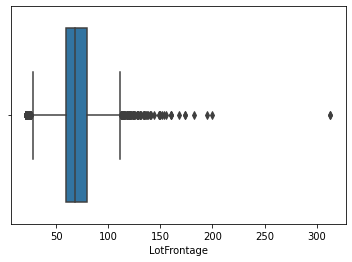

In [17]:
sns.boxplot(df.LotFrontage);

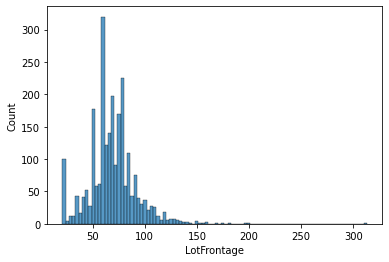

In [18]:
sns.histplot(df.LotFrontage);

In [19]:
df.LotFrontage.mean()

69.30579531442663

In [20]:
df.LotFrontage.fillna(df.LotFrontage.mean(), inplace=True)

In [21]:
df.LotFrontage.value_counts(dropna = False)

69.305795     486
60.000000     276
80.000000     137
70.000000     133
50.000000     117
             ... 
144.000000      1
111.000000      1
123.000000      1
155.000000      1
31.000000       1
Name: LotFrontage, Length: 129, dtype: int64

<br>

## Alley

In [22]:
df.Alley.value_counts(dropna = False)

NaN     2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

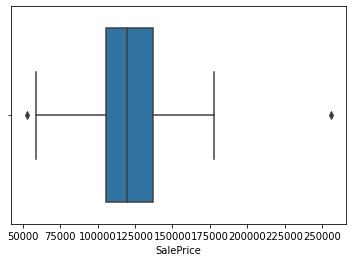

In [23]:
sns.boxplot(df[df.Alley == 'Grvl'].SalePrice);

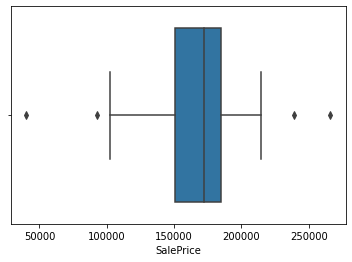

In [24]:
sns.boxplot(df[df.Alley == 'Pave'].SalePrice);

In [25]:
df.drop('Alley', axis = 1, inplace = True)

In [26]:
null_columns(df)

['Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SalePrice']


<br>

##  Utilities

In [27]:
df.Utilities.value_counts(dropna=False)

AllPub    2916
NaN          2
NoSeWa       1
Name: Utilities, dtype: int64

In [28]:
Utilities_index = df[df.Utilities.isnull()].index
df.Utilities.loc[Utilities_index] = df.Utilities.loc[Utilities_index].fillna('AllPub')

In [29]:
null_columns(df)

['Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SalePrice']


<br>

In [30]:
df.Exterior1st.value_counts(dropna = False)

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
CBlock        2
AsphShn       2
NaN           1
ImStucc       1
Name: Exterior1st, dtype: int64

In [31]:
Ext_1_index = df[df.Exterior1st.isnull()].index
df.Exterior1st.loc[Ext_1_index] = df.Exterior1st.loc[Ext_1_index].fillna('Other')

In [32]:
Ext_1_index_2 = df[(df.Exterior1st == 'CBlock') | (df.Exterior1st == 'AsphShn') | (df.Exterior1st == 'BrkComm') | (df.Exterior1st == 'Stone') |(df.Exterior1st == 'ImStucc') ].index

In [33]:
df.Exterior1st.loc[Ext_1_index_2] = 'Other'

In [34]:
null_columns(df)

['Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SalePrice']


<br>

## Exterior2nd

In [35]:
df.Exterior2nd.value_counts(dropna = False)

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
NaN           1
Name: Exterior2nd, dtype: int64

In [36]:
Ext_2_index = df[df.Exterior2nd.isnull()].index
df.Exterior2nd.loc[Ext_2_index] = df.Exterior2nd.loc[Ext_2_index].fillna('Other')

In [37]:
Ext_2_index_2 = df[(df.Exterior2nd == 'CBlock') | (df.Exterior2nd == 'AsphShn') | (df.Exterior2nd == 'Brk Cmn') | (df.Exterior2nd == 'Stone') |(df.Exterior2nd == 'ImStucc') ].index

In [38]:
df.Exterior2nd.loc[Ext_2_index_2] = 'Other'

In [39]:
null_columns(df)

['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SalePrice']


<br>

## MasVnrType

In [40]:
df.MasVnrType.value_counts(dropna = False)

None       1742
BrkFace     879
Stone       249
BrkCmn       25
NaN          24
Name: MasVnrType, dtype: int64

In [41]:
df.MasVnrType.fillna('None', inplace = True)

In [42]:
df.MasVnrType.value_counts(dropna = False)

None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

<br>

## MasVnrArea

In [43]:
df.MasVnrArea.value_counts(dropna = False)

0.0       1738
NaN         23
120.0       15
200.0       13
176.0       13
          ... 
571.0        1
207.0        1
34.0         1
550.0        1
1159.0       1
Name: MasVnrArea, Length: 445, dtype: int64

In [44]:
df.MasVnrArea.fillna(0, inplace = True)

<br>

## BsmtQual

In [45]:
df.BsmtQual.value_counts(dropna = False)

TA     1283
Gd     1209
Ex      258
Fa       88
NaN      81
Name: BsmtQual, dtype: int64

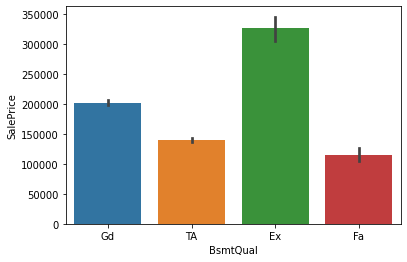

In [46]:
sns.barplot(x = df.BsmtQual, y = df.SalePrice);

In [47]:
df.BsmtQual.fillna('NoBsmt', inplace = True)

<br>

## BsmtCond

In [48]:
df.BsmtCond.value_counts(dropna = False)

TA     2606
Gd      122
Fa      104
NaN      82
Po        5
Name: BsmtCond, dtype: int64

In [49]:
df.BsmtCond.fillna('NoBsmt', inplace = True)

<br>

## BsmtExposure

In [50]:
df.BsmtExposure.value_counts(dropna = False)

No     1904
Av      418
Gd      276
Mn      239
NaN      82
Name: BsmtExposure, dtype: int64

In [51]:
df.BsmtExposure.fillna('NoBsmt', inplace = True)

In [52]:
null_columns(df)

['BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SalePrice']


<br>

## BsmtFinType1

In [53]:
df.BsmtFinType1.value_counts(dropna = False)

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
NaN     79
Name: BsmtFinType1, dtype: int64

In [54]:
df.BsmtFinType1.fillna('NoBsmt', inplace = True)

<br>

## BsmtFinType2

In [55]:
df.BsmtFinType2.value_counts(dropna = False)

Unf    2493
Rec     105
LwQ      87
NaN      80
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

In [56]:
df.BsmtFinType2.fillna('NoBsmt', inplace = True)

<br>

## BsmtFinSF1

In [57]:
df.BsmtFinSF1.value_counts(dropna = False)

0.0       929
24.0       27
16.0       14
300.0       9
384.0       8
         ... 
952.0       1
607.0       1
440.0       1
1236.0      1
344.0       1
Name: BsmtFinSF1, Length: 992, dtype: int64

In [58]:
df[df.BsmtFinSF1.isnull()].index

Int64Index([2121], dtype='int64', name='Id')

In [59]:
df.drop(index = df[df.BsmtFinSF1.isnull()].index, inplace=True)

<br>

## BsmtFinSF2

In [60]:
df.BsmtFinSF2.value_counts(dropna = False)

0.0      2571
294.0       5
180.0       5
168.0       3
162.0       3
         ... 
382.0       1
449.0       1
350.0       1
499.0       1
208.0       1
Name: BsmtFinSF2, Length: 272, dtype: int64

In [61]:
df[df.BsmtFinSF2.isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


<br>

## Electrical

In [62]:
df.Electrical.value_counts(dropna = False)

SBrkr    2671
FuseA     187
FuseF      50
FuseP       8
NaN         1
Mix         1
Name: Electrical, dtype: int64

In [63]:
nan_index_el = df[df.Electrical.isnull()].index
df.drop(index = nan_index_el, inplace = True)

In [64]:
null_columns(df)

['BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SalePrice']


<br>

## BsmtFullBath

In [65]:
df.BsmtFullBath.value_counts(dropna = False)

0.0    1704
1.0    1172
2.0      38
3.0       2
NaN       1
Name: BsmtFullBath, dtype: int64

In [66]:
df[df.BsmtFullBath.isnull()].index

Int64Index([2189], dtype='int64', name='Id')

In [67]:
df.BsmtFullBath.loc[df[df.BsmtFullBath.isnull()].index] = 0

<br>

## BsmtHalfBath

In [68]:
df.BsmtHalfBath.value_counts(dropna = False)

0.0    2741
1.0     171
2.0       4
NaN       1
Name: BsmtHalfBath, dtype: int64

In [69]:
df[df.BsmtHalfBath.isnull()].index
df.BsmtHalfBath.loc[df[df.BsmtHalfBath.isnull()].index] = 0

<br>

## KitchenQual

In [70]:
df.KitchenQual.value_counts(dropna = False)

TA     1491
Gd     1150
Ex      205
Fa       70
NaN       1
Name: KitchenQual, dtype: int64

In [71]:
import random

df['KitchenQual'].fillna(random.choice(df['KitchenQual'][df['KitchenQual'].notna()]), inplace = True)

<br>

## Functional

In [72]:
df.Functional.value_counts(dropna = False)

Typ     2715
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
NaN        2
Sev        2
Name: Functional, dtype: int64

In [73]:
df_Func_index = df[(df.Functional == 'Sev') | (df.Functional == 'Maj2') | (df.Functional == 'Maj1') | (df.Functional.isnull())].index

In [74]:
df.Functional.loc[df_Func_index] = 'Other'

<br>

## FireplaceQu

In [75]:
df.FireplaceQu.value_counts(dropna = False)

NaN    1418
Gd      744
TA      592
Fa       74
Po       46
Ex       43
Name: FireplaceQu, dtype: int64

In [76]:
df.FireplaceQu.fillna('NoFirePlace', inplace = True)

In [77]:
null_columns(df)

['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SalePrice']


<br>

## GarageType

In [78]:
df.GarageType.value_counts(dropna = False)

Attchd     1723
Detchd      778
BuiltIn     185
NaN         157
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [79]:
df.GarageType.fillna('NoGarage', inplace = True)

<br>

##  GarageYrBlt

In [80]:
df.GarageYrBlt.value_counts(dropna = False)

NaN       159
2005.0    142
2006.0    115
2007.0    114
2004.0     99
         ... 
1908.0      1
1919.0      1
1896.0      1
1933.0      1
1943.0      1
Name: GarageYrBlt, Length: 104, dtype: int64

In [81]:
df[(df.GarageYrBlt.isna())].GarageYrBlt = df[(df.GarageYrBlt.isna())].YearBuilt

In [82]:
garage_index = df[(df.GarageYrBlt.isna())].index
fill_garage = df[(df.GarageYrBlt.isna())].YearBuilt

In [83]:
df.GarageYrBlt.loc[garage_index] = df.GarageYrBlt.loc[garage_index].fillna(value = fill_garage)

<br>

## GarageFinish

In [84]:
df.GarageFinish.value_counts(dropna = False)

Unf    1229
RFn     811
Fin     718
NaN     159
Name: GarageFinish, dtype: int64

In [85]:
df.GarageFinish.fillna('NoGarage', inplace = True)

In [86]:
null_columns(df)

['GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SalePrice']


<br>

## GarageCars

In [87]:
df.GarageCars.value_counts(dropna=False)

2.0    1593
1.0     775
3.0     374
0.0     157
4.0      16
5.0       1
NaN       1
Name: GarageCars, dtype: int64

In [88]:
df.GarageCars[df.GarageCars.isnull()] = 0

<br>

## GarageArea

In [89]:
df.GarageArea.value_counts(dropna=False)

0.0       157
576.0      97
440.0      96
240.0      69
484.0      68
         ... 
475.0       1
1110.0      1
766.0       1
815.0       1
428.0       1
Name: GarageArea, Length: 604, dtype: int64

In [90]:
df[df.GarageArea.isnull()].GarageFinish

Id
2577    NoGarage
Name: GarageFinish, dtype: object

In [91]:
df.GarageArea[df.GarageArea.isnull()] = 0

<br>

## GarageQual

In [92]:
df.GarageQual.value_counts(dropna = False)

TA     2602
NaN     159
Fa      124
Gd       24
Po        5
Ex        3
Name: GarageQual, dtype: int64

In [93]:
df.GarageQual.fillna('NoGarage', inplace = True)

<br>

## GarageCond

In [94]:
df.GarageCond.value_counts(dropna = False)

TA     2652
NaN     159
Fa       74
Gd       15
Po       14
Ex        3
Name: GarageCond, dtype: int64

In [95]:
df.GarageCond.fillna('NoGarage', inplace = True)

In [96]:
null_columns(df)

['PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SalePrice']


<br>

## PoolQC

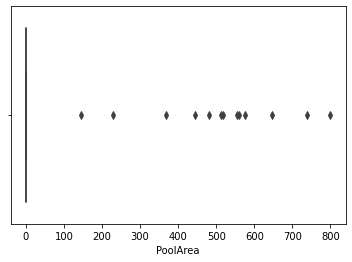

In [97]:
sns.boxplot(df.PoolArea);

In [98]:
df.drop('PoolArea', axis = 1, inplace = True)

In [99]:
df.PoolQC.value_counts(dropna = False)

NaN    2907
Ex        4
Gd        4
Fa        2
Name: PoolQC, dtype: int64

In [100]:
df.PoolQC.fillna('0', inplace = True)
pool_index = df[df.PoolQC != '0'].PoolQC.index

In [101]:
df.PoolQC.loc[pool_index] = 1
df.PoolQC.loc[pool_index]

Id
198     1
811     1
1171    1
1183    1
1299    1
1387    1
1424    1
1975    1
2574    1
2711    1
Name: PoolQC, dtype: object

In [102]:
no_pool_index = train[train.PoolQC != 1].index
train.PoolQC.loc[no_pool_index] = 0
train.PoolQC.loc[no_pool_index].value_counts()

0    1460
Name: PoolQC, dtype: int64

In [103]:
df.PoolQC = df.PoolQC.astype(int)

In [104]:
df.PoolQC.value_counts()

0    2907
1      10
Name: PoolQC, dtype: int64

In [105]:
null_columns(df)

['Fence', 'MiscFeature', 'SaleType', 'SalePrice']


<br>

## Fence

In [106]:
df.Fence.value_counts(dropna = False)

NaN      2347
MnPrv     328
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

In [107]:
df.Fence.fillna('NoFence', inplace = True)

<br>

## MiscFeature

In [108]:
df.MiscFeature.value_counts(dropna = False)

NaN     2812
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

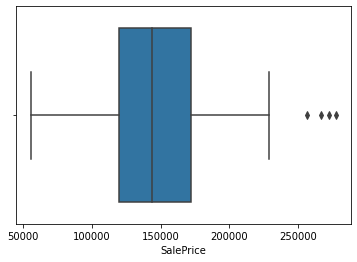

In [109]:
sns.boxplot(df[df.MiscFeature == 'Shed'].SalePrice);

In [110]:
df.drop('MiscFeature', axis = 1, inplace = True)

In [111]:
null_columns(df)

['SaleType', 'SalePrice']


<br>

## SaleType

In [112]:
df.SaleType.value_counts(dropna = False)

WD       2524
New       239
COD        87
ConLD      25
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
NaN         1
Name: SaleType, dtype: int64

In [113]:
df_ST_index = df[(df.SaleType == 'ConLD') | (df.SaleType == 'CWD') | (df.SaleType == 'ConLI') | (df.SaleType.isnull() | (df.SaleType == 'ConLw')| (df.SaleType == 'Oth')| (df.SaleType == 'Con'))].index

In [114]:
df.SaleType.loc[df_ST_index] = 'Other'

In [115]:
null_columns(df)

['SalePrice']


In [116]:
df.shape

(2917, 77)

In [117]:
df1 = df.copy()

In [118]:
for col in df.columns:
    if df[col].dtypes == 'object':
        for i in df[col].value_counts().index:
            if df[df[col] == i][col].count() < 6 :
                drop_index = df[df[col] == i].index
                for j in drop_index:
                    df.drop(index = j, axis = 0, inplace = True)

In [119]:
df.shape

(2860, 77)

In [120]:
train = df[df.SalePrice.notna()]

In [121]:
test = df[df.SalePrice.isna()]

In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 1 to 1460
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1425 non-null   int64  
 1   MSZoning       1425 non-null   object 
 2   LotFrontage    1425 non-null   float64
 3   LotArea        1425 non-null   int64  
 4   Street         1425 non-null   object 
 5   LotShape       1425 non-null   object 
 6   LandContour    1425 non-null   object 
 7   Utilities      1425 non-null   object 
 8   LotConfig      1425 non-null   object 
 9   LandSlope      1425 non-null   object 
 10  Neighborhood   1425 non-null   object 
 11  Condition1     1425 non-null   object 
 12  Condition2     1425 non-null   object 
 13  BldgType       1425 non-null   object 
 14  HouseStyle     1425 non-null   object 
 15  OverallQual    1425 non-null   int64  
 16  OverallCond    1425 non-null   int64  
 17  YearBuilt      1425 non-null   int64  
 18  YearRemo

In [123]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 1461 to 2919
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1435 non-null   int64  
 1   MSZoning       1435 non-null   object 
 2   LotFrontage    1435 non-null   float64
 3   LotArea        1435 non-null   int64  
 4   Street         1435 non-null   object 
 5   LotShape       1435 non-null   object 
 6   LandContour    1435 non-null   object 
 7   Utilities      1435 non-null   object 
 8   LotConfig      1435 non-null   object 
 9   LandSlope      1435 non-null   object 
 10  Neighborhood   1435 non-null   object 
 11  Condition1     1435 non-null   object 
 12  Condition2     1435 non-null   object 
 13  BldgType       1435 non-null   object 
 14  HouseStyle     1435 non-null   object 
 15  OverallQual    1435 non-null   int64  
 16  OverallCond    1435 non-null   int64  
 17  YearBuilt      1435 non-null   int64  
 18  YearR

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2860 entries, 1 to 2919
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2860 non-null   int64  
 1   MSZoning       2860 non-null   object 
 2   LotFrontage    2860 non-null   float64
 3   LotArea        2860 non-null   int64  
 4   Street         2860 non-null   object 
 5   LotShape       2860 non-null   object 
 6   LandContour    2860 non-null   object 
 7   Utilities      2860 non-null   object 
 8   LotConfig      2860 non-null   object 
 9   LandSlope      2860 non-null   object 
 10  Neighborhood   2860 non-null   object 
 11  Condition1     2860 non-null   object 
 12  Condition2     2860 non-null   object 
 13  BldgType       2860 non-null   object 
 14  HouseStyle     2860 non-null   object 
 15  OverallQual    2860 non-null   int64  
 16  OverallCond    2860 non-null   int64  
 17  YearBuilt      2860 non-null   int64  
 18  YearRemo